In [3]:
from google.colab import files
uploaded = files.upload()



Saving test.csv.zip to test.csv (1).zip


In [12]:
import pandas as pd

df = pd.read_csv('test.csv (1).zip')  # Replace with actual filename
df.head()


,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [13]:
!pip install nltk scikit-learn


In [14]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W|\d', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)



In [16]:
df['text'] = df['Title'] + " " + df['Description']
df['text'] = df['text'].apply(clean_text)
df['label'] = df['Class Index']

In [25]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=10000,      # Try increasing features
    min_df=3,                # Remove rare terms
    max_df=0.9,              # Remove very common terms
    stop_words='english'     # Remove stopwords directly
)
X = vectorizer.fit_transform(df['text'])
y = df['label']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("🔸 Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


🔸 Naive Bayes Accuracy: 0.8940789473684211
              precision    recall  f1-score   support

           1       0.88      0.90      0.89       373
           2       0.93      0.97      0.95       389
           3       0.86      0.87      0.87       359
           4       0.91      0.83      0.87       399

    accuracy                           0.89      1520
   macro avg       0.89      0.89      0.89      1520
weighted avg       0.89      0.89      0.89      1520



In [28]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🔸 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔸 SVM Accuracy: 0.8828947368421053
              precision    recall  f1-score   support

           1       0.88      0.89      0.88       373
           2       0.94      0.95      0.94       389
           3       0.84      0.86      0.85       359
           4       0.88      0.83      0.85       399

    accuracy                           0.88      1520
   macro avg       0.88      0.88      0.88      1520
weighted avg       0.88      0.88      0.88      1520



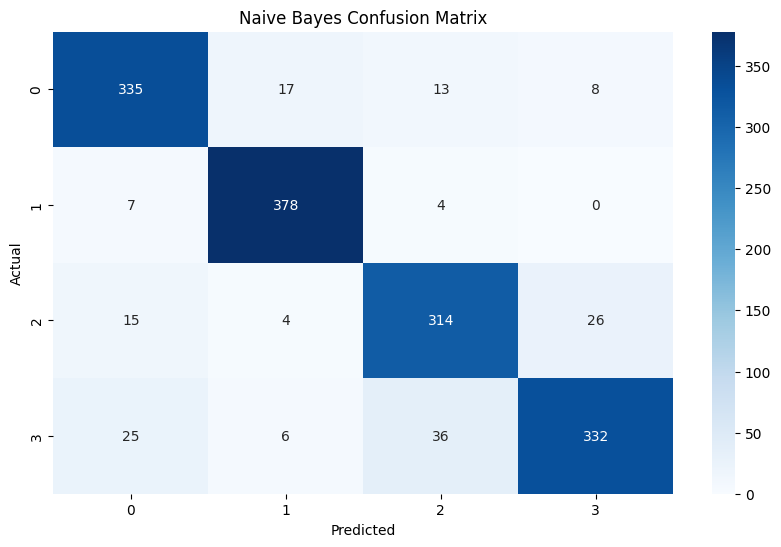

In [29]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
